In [0]:
from __future__ import print_function
import torch

In [2]:
torch.empty(5, 3)

tensor([[2.3286e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])

In [3]:
torch.rand(5, 3)

tensor([[0.5946, 0.4472, 0.1578],
        [0.3111, 0.0442, 0.3657],
        [0.9424, 0.0392, 0.0811],
        [0.4884, 0.7709, 0.1048],
        [0.2639, 0.3515, 0.8265]])

In [4]:
torch.zeros(5, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [5]:
torch.tensor([[1,2,3,4,5],[6,7,7,8,9]])

tensor([[1, 2, 3, 4, 5],
        [6, 7, 7, 8, 9]])

In [6]:
torch.ones(5, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [7]:
x = torch.zeros(5, 3)
x.size()

torch.Size([5, 3])

In [8]:
# Addition of sensors
y = torch.rand(5, 3)
print(y)
x = torch.ones(5, 3)
print(x)
print(x + y)

tensor([[0.3145, 0.1417, 0.2011],
        [0.3888, 0.6923, 0.7217],
        [0.7609, 0.6728, 0.3653],
        [0.5235, 0.1550, 0.2488],
        [0.0841, 0.5956, 0.5885]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.3145, 1.1417, 1.2011],
        [1.3888, 1.6923, 1.7217],
        [1.7609, 1.6728, 1.3653],
        [1.5235, 1.1550, 1.2488],
        [1.0841, 1.5956, 1.5885]])


In [9]:
print(torch.add(x, y))

tensor([[1.3145, 1.1417, 1.2011],
        [1.3888, 1.6923, 1.7217],
        [1.7609, 1.6728, 1.3653],
        [1.5235, 1.1550, 1.2488],
        [1.0841, 1.5956, 1.5885]])


In [10]:
y.add_(x)

tensor([[1.3145, 1.1417, 1.2011],
        [1.3888, 1.6923, 1.7217],
        [1.7609, 1.6728, 1.3653],
        [1.5235, 1.1550, 1.2488],
        [1.0841, 1.5956, 1.5885]])

In [11]:
# Reshaping tensors
x = torch.ones(4, 4)
a = x.view(16)
print(a.size())
print(a)

torch.Size([16])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


## Autograd : Automatic Differentiation

In [0]:
import torch

In [13]:
x = torch.ones(2, 2 ,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [0]:
y = x + 2

In [15]:
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [16]:
y.grad_fn

In [17]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [18]:
out

tensor(27., grad_fn=<MeanBackward0>)

In [0]:
out.backward()

In [20]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [0]:
x = torch.randn(3, requires_grad=True)

In [22]:
x

tensor([ 0.2801, -0.6123, -0.1708], requires_grad=True)

In [0]:
y = x * 2

In [24]:
y.data.norm()

tensor(1.3894)

In [25]:
while y.data.norm() < 1000:
  y = y * 2
print(y)

tensor([  573.6873, -1254.0598,  -349.8452], grad_fn=<MulBackward0>)


In [0]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

In [27]:
print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


## Training Neural Network in PyTorch
- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)

    self.fc1 = nn.Linear(16 * 6 * 6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))

    x = F.max_pool2d(F.relu(self.conv2(x)), 2)

    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

net = Net()
print(net)



Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [36]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [37]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0157, -0.0907, -0.0689, -0.0801,  0.1218, -0.0010, -0.1087,  0.1194,
         -0.0476, -0.1079]], grad_fn=<AddmmBackward>)


In [0]:
net.zero_grad()

In [0]:
out.backward(torch.randn(1, 10))

## Loss Function

In [0]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

In [42]:
loss = criterion(output, target)
print(loss)

tensor(1.2273, grad_fn=<MseLossBackward>)


## Back Propogation

In [0]:
net.zero_grad()

In [44]:
print("print the net.conv1.bias.grad before backward")
print(net.conv1.bias.grad)

print the net.conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])


In [0]:
loss.backward()

In [46]:
print("Print the net.conv1.bias.grad after backward")
print(net.conv1.bias.grad)

Print the net.conv1.bias.grad after backward
tensor([ 0.0034, -0.0021,  0.0107, -0.0059,  0.0067,  0.0097])


## Update the weights

In [0]:
import torch.optim as optim

In [0]:
# Create the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [0]:
## in your training loop
optimizer.zero_grad()

output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

# Training a Classifier

## Training an image classifier (CIFAR 10)

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [55]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

0it [00:00, ?it/s]

170500096it [00:06, 25694832.84it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [57]:
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Visualising Images

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

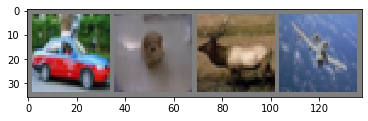

  car 	  dog 	 deer 	plane


In [67]:
imshow(torchvision.utils.make_grid(images))
print(' \t'.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training the network

In [71]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    # Forward + Backward + Optimiser
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Print Staticstics
    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch +1, i+1, running_loss / 2000))
      running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.178
[1,  4000] loss: 1.874
[1,  6000] loss: 1.706
[1,  8000] loss: 1.599
[1, 10000] loss: 1.546
[1, 12000] loss: 1.490
[2,  2000] loss: 1.427
[2,  4000] loss: 1.398
[2,  6000] loss: 1.377
[2,  8000] loss: 1.349
[2, 10000] loss: 1.326
[2, 12000] loss: 1.321
Finished Training


In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

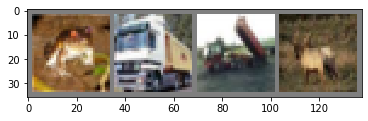

GroundTruth:   frog truck truck  deer


In [73]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [75]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [0]:
_, predicted = torch.max(outputs, 1)

In [78]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog truck truck  deer


In [79]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [80]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 70 %
Accuracy of  bird : 28 %
Accuracy of   cat : 27 %
Accuracy of  deer : 63 %
Accuracy of   dog : 56 %
Accuracy of  frog : 55 %
Accuracy of horse : 63 %
Accuracy of  ship : 60 %
Accuracy of truck : 56 %
